<a href="https://colab.research.google.com/github/AbhayMudgal/MINST/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras as K
from google.colab import files
from keras.preprocessing import image

mnist = K.datasets.fashion_mnist

In [ ]:
class myCallback(K.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('acc')>0.9):
      print("90% accuracy reached")
      self.model.stop_training = True


(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#print(x_train.shape, x_test.shape) 
x_train_CNN = x_train
x_test_CNN = x_test

x_train_CNN = x_train_CNN.reshape(60000, 28, 28, 1)
x_test_CNN = x_test_CNN.reshape(10000, 28, 28, 1)

In [ ]:
neural_network = K.models.Sequential([
  K.layers.Flatten(input_shape = (28, 28)),
  K.layers.Dense(512, activation = 'relu'),
  K.layers.Dense(10, activation = 'softmax')   
])

CNN = K.models.Sequential([
  K.layers.Conv2D(8, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
  K.layers.MaxPool2D(2, 2),
  K.layers.Flatten(),
  K.layers.Dense(512, activation = 'relu'),
  K.layers.Dense(10, activation = 'softmax')                       
])

CNN2 = K.models.Sequential([
  K.layers.Conv2D(8, (3, 3), activation = 'relu', input_shape = (28, 28, 1)),
  K.layers.MaxPool2D(2, 2),
  K.layers.Conv2D(16, (3, 3), activation = 'relu'),
  K.layers.MaxPool2D(2, 2),
  K.layers.Flatten(),
  K.layers.Dense(512, activation = 'relu'),
  K.layers.Dense(10, activation = 'softmax')                       
])

In [ ]:
opt1 = K.optimizers.Adam(learning_rate = 0.1, beta_1 = 0.9, beta_2 = 0.99, decay = 0.1)
opt2 = K.optimizers.Adam(learning_rate = 0.2, beta_1 = 0.9, beta_2 = 0.99, decay = 0.1)
opt3 = K.optimizers.Adam(learning_rate = 0.5, beta_1 = 0.9, beta_2 = 0.99, decay = 0.1)

In [ ]:
neural_network.compile(optimizer = opt1, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
CNN.compile(optimizer = opt1, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
CNN2.compile(optimizer = opt1, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-3 * 2**(epoch / 2))

Epoch 1/20
1688/1688 [==============================] - 7s 2ms/step - loss: 0.6349 - accuracy: 0.7957 - val_loss: 0.5736 - val_accuracy: 0.8117
Epoch 2/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5639 - accuracy: 0.8191 - val_loss: 0.5494 - val_accuracy: 0.8178
Epoch 3/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5432 - accuracy: 0.8241 - val_loss: 0.5331 - val_accuracy: 0.8238
Epoch 4/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.5275 - accuracy: 0.8276 - val_loss: 0.5187 - val_accuracy: 0.8278
Epoch 5/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5139 - accuracy: 0.8319 - val_loss: 0.5066 - val_accuracy: 0.8295
Epoch 6/20
1688/1688 [==============================] - 3s 2ms/step - loss: 0.5008 - accuracy: 0.8361 - val_loss: 0.4951 - val_accuracy: 0.8323
Epoch 7/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.4881 - accuracy: 0.8391 - val_loss: 0.4819 - val_accuracy:

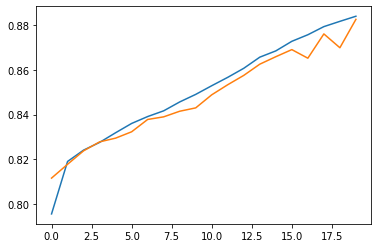

In [ ]:
history_NN = neural_network.fit(x_train, y_train, epochs = 20, validation_split = 0.1, callbacks = [lr_schedule], shuffle = True)
plt.plot(history_NN.history['accuracy'], label = 'train')
plt.plot(history_NN.history['val_accuracy'], label = 'validation')
plt.show()

(0.001, 10.0, 0.0, 1.0)

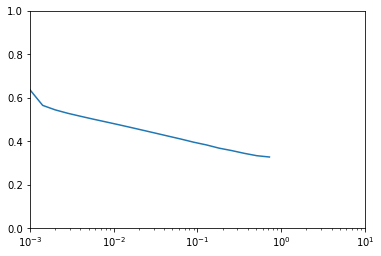

In [ ]:
plt.semilogx(history_NN.history["lr"], history_NN.history["loss"])
plt.axis([1e-3, 1e1, 0, 1])

Epoch 1/20
1688/1688 [==============================] - 33s 3ms/step - loss: 2.3025 - accuracy: 0.1235 - val_loss: 2.2880 - val_accuracy: 0.1507
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 2.2682 - accuracy: 0.2191 - val_loss: 2.2489 - val_accuracy: 0.2675
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 2.2229 - accuracy: 0.3046 - val_loss: 2.1963 - val_accuracy: 0.3432
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 2.1611 - accuracy: 0.4001 - val_loss: 2.1239 - val_accuracy: 0.4413
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 2.0736 - accuracy: 0.4644 - val_loss: 2.0205 - val_accuracy: 0.4998
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 1.9467 - accuracy: 0.5403 - val_loss: 1.8695 - val_accuracy: 0.5822
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 1.7627 - accuracy: 0.5992 - val_loss: 1.6547 - val_accuracy

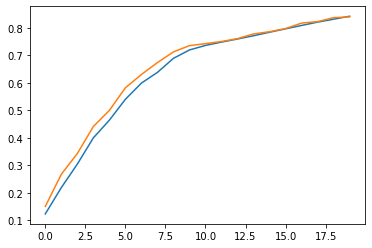

In [ ]:
history_CNN = CNN.fit(x_train_CNN, y_train, epochs = 20, validation_split = 0.1, callbacks = [lr_schedule], shuffle = True)
plt.plot(history_CNN.history['accuracy'], label = 'train')
plt.plot(history_CNN.history['val_accuracy'], label = 'validation')
plt.show()

(0.001, 10.0, 0.0, 1.0)

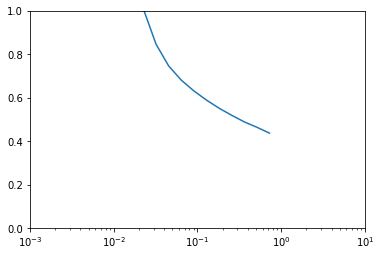

In [ ]:
plt.semilogx(history_CNN.history["lr"], history_CNN.history["loss"])
plt.axis([1e-3, 1e1, 0, 1])

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4136 - accuracy: 0.8525 - val_loss: 0.4172 - val_accuracy: 0.8502
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4057 - accuracy: 0.8577 - val_loss: 0.4149 - val_accuracy: 0.8517
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4040 - accuracy: 0.8588 - val_loss: 0.4138 - val_accuracy: 0.8520
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4032 - accuracy: 0.8589 - val_loss: 0.4133 - val_accuracy: 0.8508
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4026 - accuracy: 0.8591 - val_loss: 0.4132 - val_accuracy: 0.8495
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4022 - accuracy: 0.8591 - val_loss: 0.4123 - val_accuracy: 0.8502
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.4017 - accuracy: 0.8589 - val_loss: 0.4119 - val_accuracy:

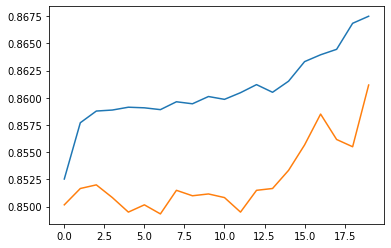

In [ ]:
history_CNN2 = CNN2.fit(x_train_CNN, y_train, epochs = 20, validation_split = 0.1, callbacks = [lr_schedule], shuffle = True)
plt.plot(history_CNN2.history['accuracy'], label = 'train')
plt.plot(history_CNN2.history['val_accuracy'], label = 'validation')
plt.show()

(0.001, 10.0, 0.0, 1.0)

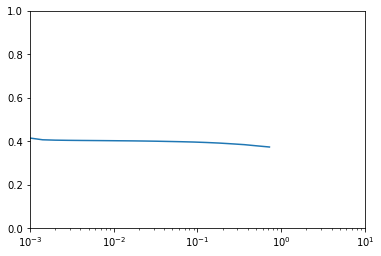

In [ ]:
plt.semilogx(history_CNN2.history["lr"], history_CNN2.history["loss"])
plt.axis([1e-3, 1e1, 0, 1])

Epoch 1/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2827 - accuracy: 0.8991 - val_loss: 0.3184 - val_accuracy: 0.8830
Epoch 2/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2749 - accuracy: 0.9013 - val_loss: 0.3202 - val_accuracy: 0.8828
Epoch 3/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2687 - accuracy: 0.9036 - val_loss: 0.3108 - val_accuracy: 0.8880
Epoch 4/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2618 - accuracy: 0.9063 - val_loss: 0.3135 - val_accuracy: 0.8888
Epoch 5/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9077 - val_loss: 0.3118 - val_accuracy: 0.8882
Epoch 6/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2528 - accuracy: 0.9089 - val_loss: 0.3002 - val_accuracy: 0.8918
Epoch 7/20
1688/1688 [==============================] - 4s 2ms/step - loss: 0.2471 - accuracy: 0.9115 - val_loss: 0.3057 - val_accuracy:

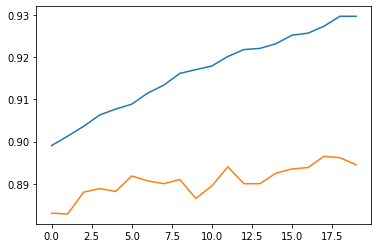

In [ ]:
history_NN = neural_network.fit(x_train, y_train, epochs = 20, validation_split = 0.1, shuffle = True)
plt.plot(history_NN.history['accuracy'], label = 'train')
plt.plot(history_NN.history['val_accuracy'], label = 'validation')
plt.show()

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3605 - accuracy: 0.8717 - val_loss: 0.3693 - val_accuracy: 0.8667
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3536 - accuracy: 0.8745 - val_loss: 0.3622 - val_accuracy: 0.8713
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3467 - accuracy: 0.8763 - val_loss: 0.3620 - val_accuracy: 0.8700
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3405 - accuracy: 0.8787 - val_loss: 0.3535 - val_accuracy: 0.8698
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3348 - accuracy: 0.8807 - val_loss: 0.3521 - val_accuracy: 0.8733
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3301 - accuracy: 0.8822 - val_loss: 0.3453 - val_accuracy: 0.8752
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.3254 - accuracy: 0.8835 - val_loss: 0.3479 - val_accuracy:

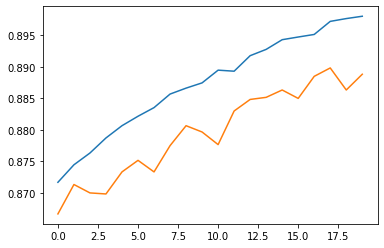

In [ ]:
history_CNN = CNN.fit(x_train_CNN, y_train, epochs = 20, validation_split = 0.1, shuffle = True)
plt.plot(history_CNN.history['accuracy'], label = 'train')
plt.plot(history_CNN.history['val_accuracy'], label = 'validation')
plt.show()

Epoch 1/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2788 - accuracy: 0.9000 - val_loss: 0.3123 - val_accuracy: 0.8895
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2768 - accuracy: 0.9003 - val_loss: 0.3127 - val_accuracy: 0.8872
Epoch 3/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2740 - accuracy: 0.9009 - val_loss: 0.3050 - val_accuracy: 0.8925
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2716 - accuracy: 0.9021 - val_loss: 0.3141 - val_accuracy: 0.8883
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2697 - accuracy: 0.9028 - val_loss: 0.3051 - val_accuracy: 0.8905
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2679 - accuracy: 0.9031 - val_loss: 0.2999 - val_accuracy: 0.8935
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2653 - accuracy: 0.9048 - val_loss: 0.3006 - val_accuracy:

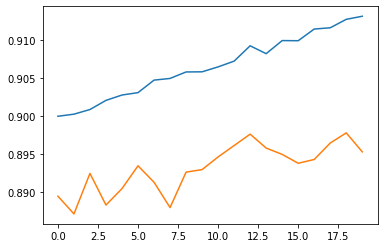

In [ ]:
history_CNN2 = CNN2.fit(x_train_CNN, y_train, epochs = 20, validation_split = 0.1, shuffle = True)
plt.plot(history_CNN2.history['accuracy'], label = 'train')
plt.plot(history_CNN2.history['val_accuracy'], label = 'validation')
plt.show()

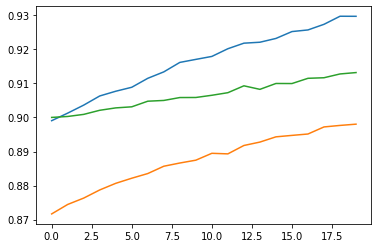

In [ ]:
plt.plot(history_NN.history['accuracy'], label = 'NN_train')
plt.plot(history_CNN.history['accuracy'], label = 'CNN_train')
plt.plot(history_CNN2.history['accuracy'], label = 'CNN2_train')
plt.show()

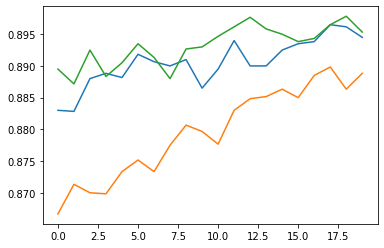

In [ ]:
plt.plot(history_NN.history['val_accuracy'], label = 'NN_val')
plt.plot(history_CNN.history['val_accuracy'], label = 'CNN_val')
plt.plot(history_CNN2.history['val_accuracy'], label = 'CNN2_val')
plt.show()

In [ ]:
#Only greyscale images can be used for the following model. 
uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(28, 28))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  CNN_classes = CNN.predict(images, batch_size=10)
  CNN_2_classes = CNN2.predict(images, batch_size=10)
  NN_classes = neural_network.predict(images, batch_size=10)
  print(fn)
  print(NN_classes, CNN_classes, CNN_2_classes)
